In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
NUM_TRIALS = 100000
EPSILON = 0.1
BANDIT_PROBS = [0.2, 0.4, 0.3, 0.1]
K = 0.0001
MIN_EPSILON = 0.0
LAMBDA = 0.99
LOG_A, LOG_B, LOG_C = 2, 4, 1

In [49]:
class Bandit:
  def __init__(self, enum, win_rate):
    self.enum = enum
    self.win_rate = win_rate
    self.win_rate_estimate = 0.0
    self.number_of_samples = 0

  def pull(self):
    # draw a 1 with probability of win_rate
    return np.random.random() < self.win_rate

  def update(self, new_sample):
    self.number_of_samples += 1
    self.win_rate_estimate = self.win_rate_estimate + (new_sample - self.win_rate_estimate) / self.number_of_samples

In [50]:
from enum import Enum

class EpsilonStrategy(Enum):
    CONSTANT = 0
    DECAY_DENOM = 1
    DECAY_OUTER_BOUND = 2
    DECAY_EXPONENTIAL = 3
    DECAY_LOG = 4

def get_epsilon(strategy: EpsilonStrategy, time):
    if strategy == EpsilonStrategy.CONSTANT:
      return EPSILON
    elif strategy == EpsilonStrategy.DECAY_DENOM:
      return 1 / time
    elif strategy == EpsilonStrategy.DECAY_OUTER_BOUND:
      return max(EPSILON - K * time, MIN_EPSILON)
    elif strategy == EpsilonStrategy.DECAY_EXPONENTIAL:
      return EPSILON * np.power(LAMBDA, time)
    elif strategy == EpsilonStrategy.DECAY_LOG:
      return LOG_A / np.log(LOG_B * time + LOG_C)

In [51]:
def epsilon_greedy_experiment():
  bandits = [Bandit(idx, p) for idx, p in enumerate(BANDIT_PROBS)]
  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([bandit.win_rate for bandit in bandits])
  print(f"Optimal bandit: {optimal_j}")

  for i in range(NUM_TRIALS):
      # use epsilon greedy to select the next bandit
      if np.random.random() < get_epsilon(EpsilonStrategy.DECAY_OUTER_BOUND, i + 1):
        num_times_explored += 1
        j = np.random.choice(a=len(BANDIT_PROBS))
      else:
        num_times_exploited += 1
        j = np.argmax([bandit.win_rate_estimate for bandit in bandits])

      if j == optimal_j:
        num_optimal += 1

      # pull the arm for the bandit with the largest sample
      x = bandits[j].pull()
      # update rewards log
      rewards[i] = x
      # update the distribution for the bandit whose arm we just pulled
      bandits[j].update(x)

  for bandit in bandits:
      print(f"Mean estimate of {bandit.enum}. bandit: {bandit.win_rate_estimate}")

  # print out the results
  print(f"Total reward earned: {rewards.sum()}")
  print(f"Overall win rate: {rewards.sum() / NUM_TRIALS}")
  print(f"Number of times explored: {num_times_explored}")
  print(f"Number of times exploited: {num_times_exploited}")
  print(f"Number of times selected optimal bandit: {num_optimal}")

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates);
  plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBS));

Optimal bandit: 1
Mean estimate of 0. bandit: 0.20710059171597636
Mean estimate of 1. bandit: 0.11764705882352944
Mean estimate of 2. bandit: 0.2989589491297829
Mean estimate of 3. bandit: 0.09090909090909091
Total reward earned: 29875.0
Overall win rate: 0.29875
Number of times explored: 55
Number of times exploited: 99945
Number of times selected optimal bandit: 17


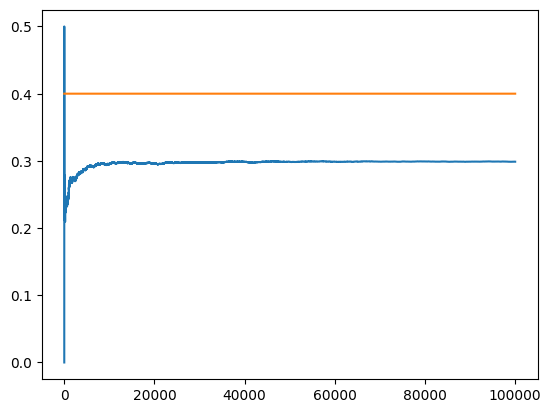

In [53]:
if __name__ == "__main__":
  epsilon_greedy_experiment()